In [10]:
import tensorflow as tf
import numpy as np
import matplotlib
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Reshape
from tensorflow.keras.regularizers import L1L2
import matplotlib.pyplot as plt

In [11]:
(X_treinamento, _), (_, _) = mnist.load_data()

In [12]:
X_treinamento = X_treinamento.astype('float32') / 255

In [13]:
X_treinamento[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
600000 / 256

2343.75

In [15]:
X_treinamento = tf.data.Dataset.from_tensor_slices(X_treinamento).shuffle(buffer_size=600000).batch(batch_size=256)

In [16]:
type(X_treinamento)

tensorflow.python.data.ops.batch_op._BatchDataset

In [17]:
28 * 28

784

In [18]:
# Gerador
# 100 -> 500 -> 500
gerador = Sequential()
gerador.add(Dense(units = 500, input_dim=100, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
gerador.add(Dense(units = 500, input_dim=100, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
gerador.add(Dense(units = 784, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
gerador.add(Reshape((28, 28)))
gerador.summary()

c:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        50,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 784)            │       392,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,784 (2.65 MB)

 Trainable params: 693,784 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# (28, 28)/784 -> 500 -> 500 -> 1
discriminador = Sequential()
discriminador.add(InputLayer(input_shape=(28,28)))
discriminador.add(Flatten())
discriminador.add(Dense(units=500, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
discriminador.add(Dense(units=500, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
discriminador.add(Dense(units=1, activation='sigmoid', kernel_regularizer=L1L2(1e-5, 1e-5)))
discriminador.summary()

c:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,501 (2.45 MB)

 Trainable params: 643,501 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

In [21]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [22]:
def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [23]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [24]:
epochs = 100
noise_dim = 100

In [25]:
tf.random.normal([256, noise_dim])

<tf.Tensor: shape=(256, 100), dtype=float32, numpy=
array([[ 1.2296798 , -1.1544151 , -0.22615632, ...,  1.5213238 ,
         0.31305736,  0.3709377 ],
       [-1.6281047 ,  0.18046434,  0.38281465, ..., -0.29308003,
        -1.1781396 ,  1.9725205 ],
       [-1.2596245 ,  0.43381023, -0.09468899, ..., -0.7078353 ,
        -0.27046016, -1.9109377 ],
       ...,
       [-0.26345104,  0.70030886,  2.2648237 , ..., -0.29960102,
         0.19995406,  1.2873504 ],
       [-0.8884463 , -0.7558158 ,  0.7424349 , ..., -0.66796076,
         0.4914742 ,  0.22309296],
       [-1.3165975 , -0.39647955,  0.4434593 , ...,  1.1251913 ,
        -0.3914033 ,  0.82849765]], dtype=float32)>

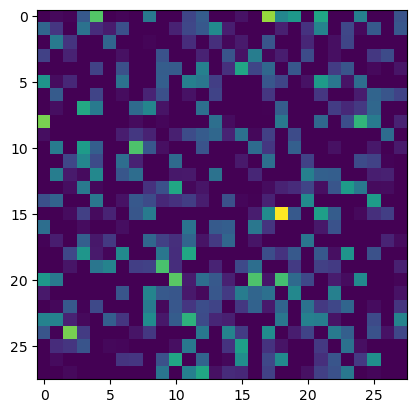

In [26]:
plt.imshow(gerador(tf.random.normal([256, noise_dim]))[2]);

In [27]:
def train_step(images):
  noise = tf.random.normal([256, noise_dim])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = gerador(noise, training = True)

    real_output = discriminador(images, training = True)
    fake_output = discriminador(generated_images, training = True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, gerador.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminador.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, gerador.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminador.trainable_variables))

  return gen_loss, disc_loss

In [28]:
for epoch in range(epochs):
  for image_batch in X_treinamento:
    gen_loss_batch, disc_loss_batch = train_step(image_batch)
  print(f'Época {epoch} | gen_loss: {gen_loss_batch} disc_loss {disc_loss_batch}')

Época 0 | gen_loss: 4.325802803039551 disc_loss 0.09338679164648056
Época 1 | gen_loss: 6.458195209503174 disc_loss 0.02345866709947586
Época 2 | gen_loss: 6.655374526977539 disc_loss 0.014267493039369583
Época 3 | gen_loss: 6.617979049682617 disc_loss 0.023381918668746948
Época 4 | gen_loss: 5.435578346252441 disc_loss 0.012918504886329174
Época 5 | gen_loss: 2.6682944297790527 disc_loss 0.10373053699731827
Época 6 | gen_loss: 4.985210418701172 disc_loss 0.055973298847675323
Época 7 | gen_loss: 5.712966442108154 disc_loss 0.005875173024833202
Época 8 | gen_loss: 7.154040336608887 disc_loss 0.02619909681379795
Época 9 | gen_loss: 6.927733421325684 disc_loss 0.0031754400115460157
Época 10 | gen_loss: 7.170382499694824 disc_loss 0.0030081274453550577
Época 11 | gen_loss: 8.498746871948242 disc_loss 0.005507809109985828
Época 12 | gen_loss: 6.902057647705078 disc_loss 0.0034708811435848475
Época 13 | gen_loss: 8.790779113769531 disc_loss 0.0013463691575452685
Época 14 | gen_loss: 7.785665

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


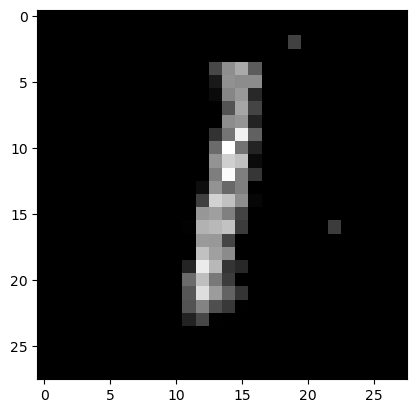

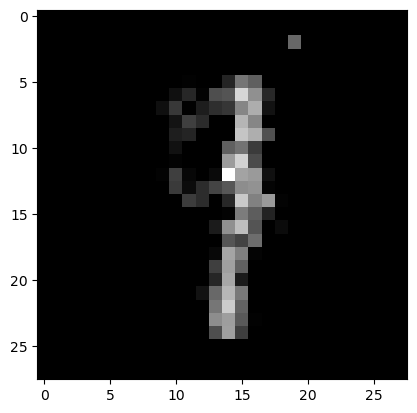

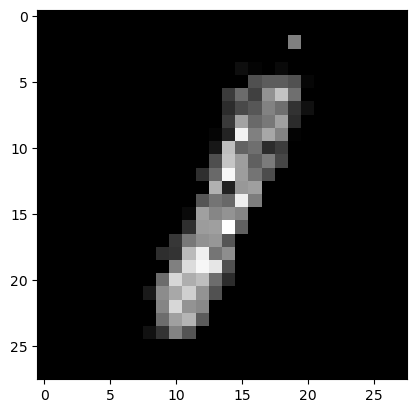

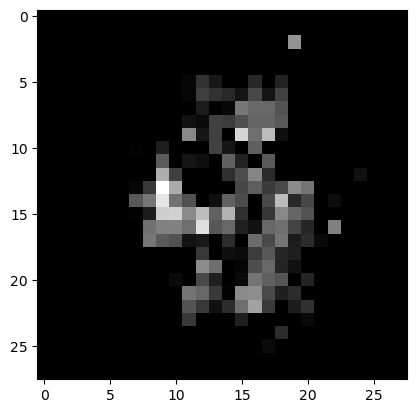

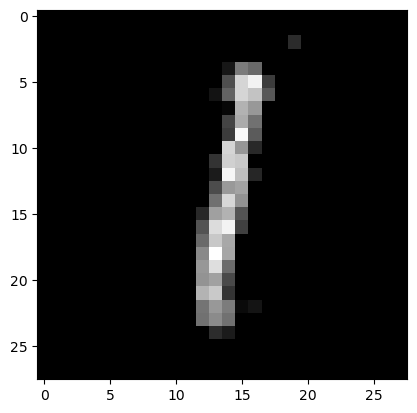

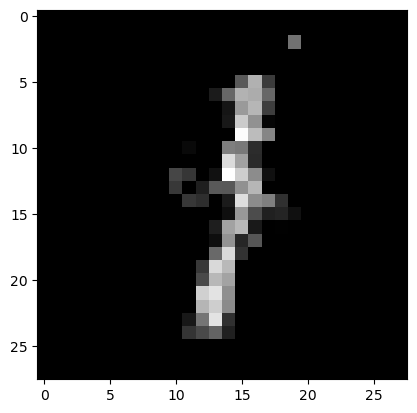

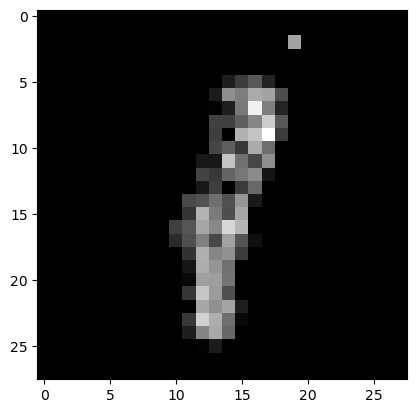

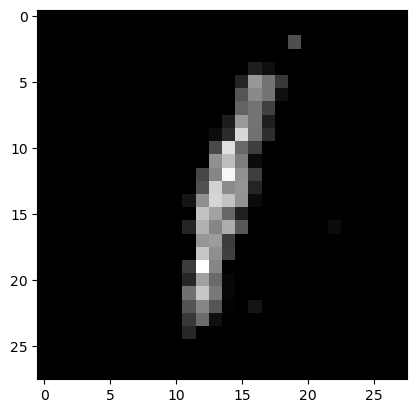

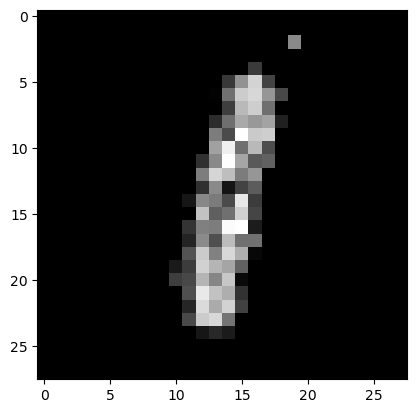

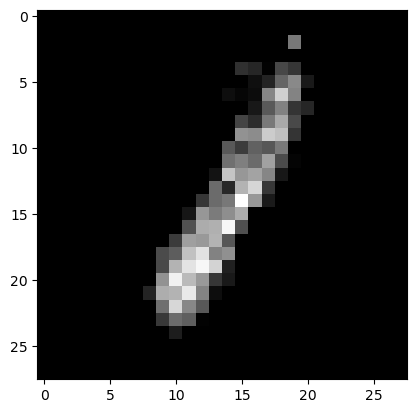

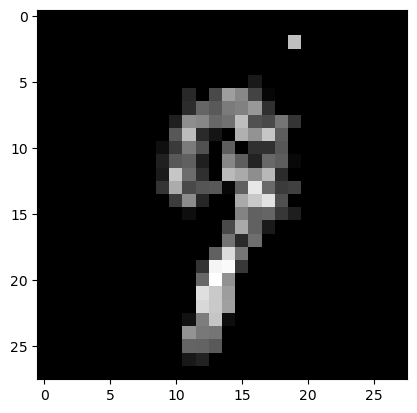

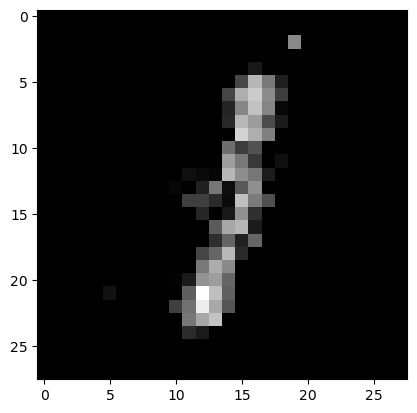

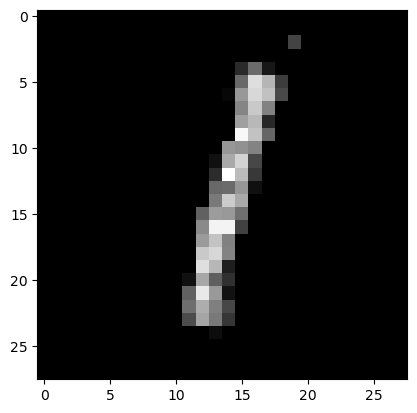

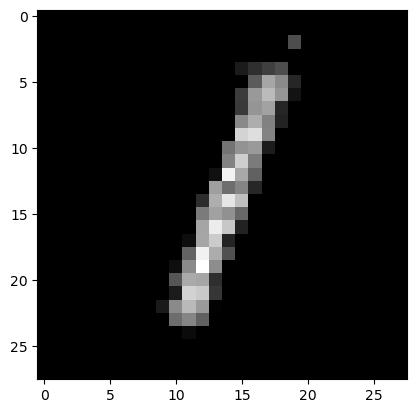

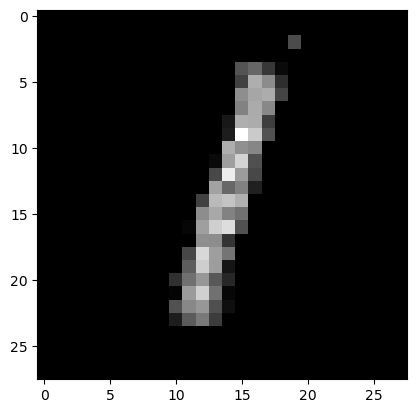

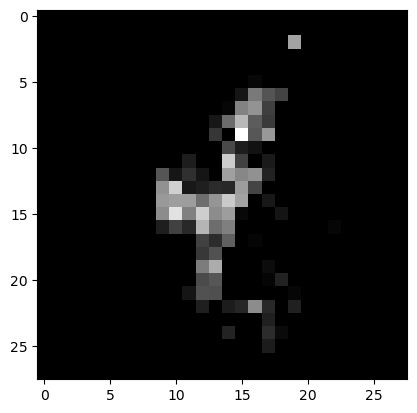

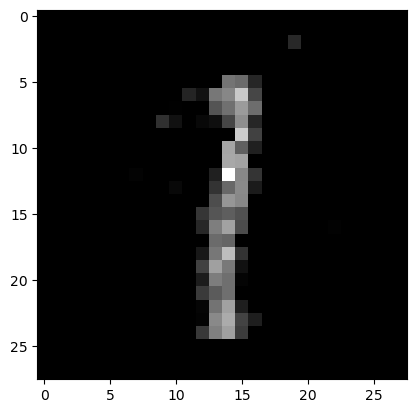

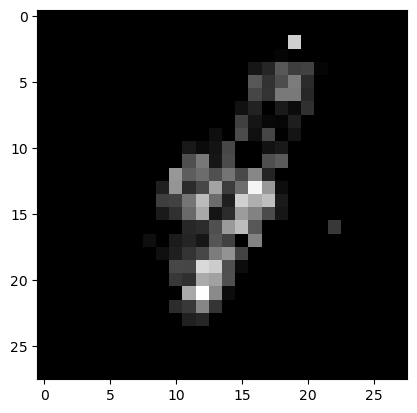

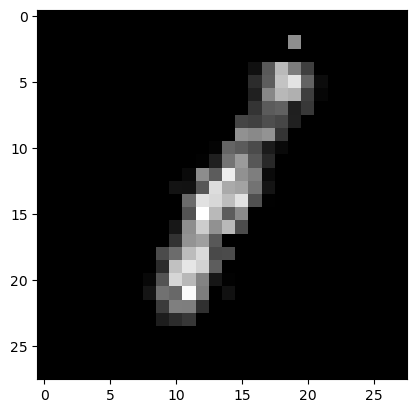

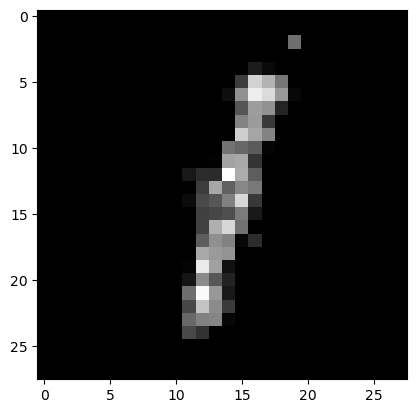

In [29]:
amostras = np.random.normal(size=(20, 100))
previsao = gerador.predict(amostras)
for i in range(previsao.shape[0]):
  plt.imshow(previsao[i, :], cmap='gray')
  plt.show()